0. Install and Import Dependencies

In [6]:
!pip install easyocr
!pip install imutils

In [7]:
!pip install --upgrade matplotlib
!pip install --upgrade opencv-python

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.


In [9]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


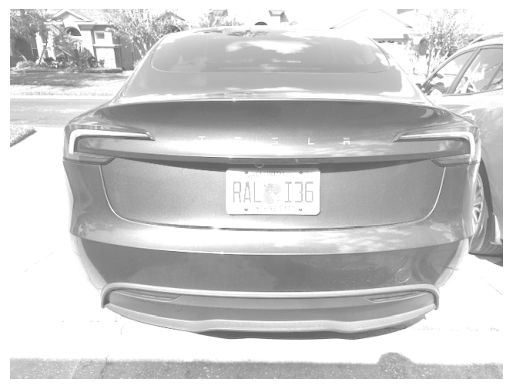

In [10]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('IMG_3483.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Increase brightness by adding a constant value
brightness_value = 100  # Adjust this value to increase/decrease brightness
bright_gray = cv2.add(gray, brightness_value)
plt.imshow(cv2.cvtColor(bright_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

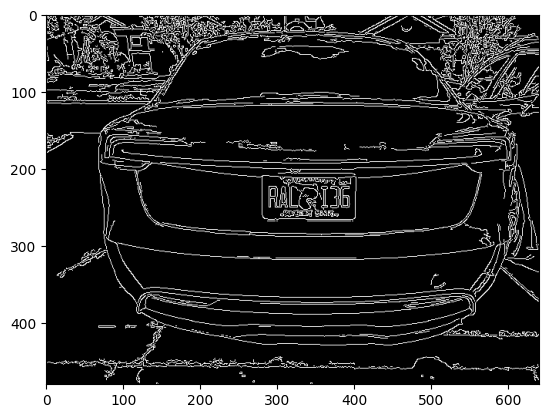

In [11]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [12]:
import imutils
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]


In [13]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 20, True)
    if len(approx) ==4:
        location = approx
        break

In [14]:
location

array([[[280, 211]],

       [[400, 210]],

       [[401, 263]],

       [[284, 265]]], dtype=int32)

In [15]:
import numpy as np
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

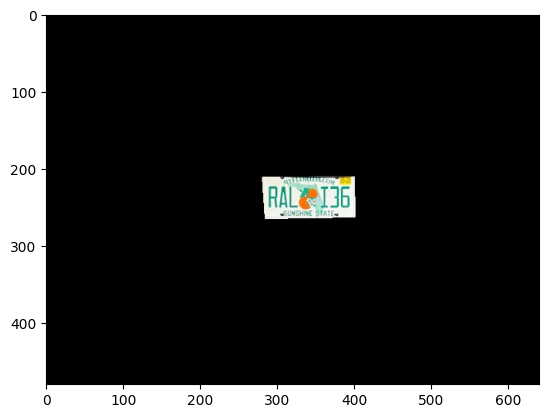

In [16]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [17]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

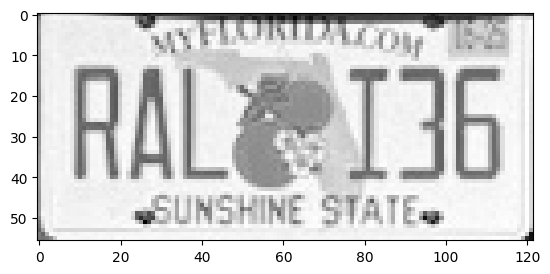

In [18]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [19]:
import easyocr 
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(5), np.int32(7)],
   [np.int32(121), np.int32(7)],
   [np.int32(121), np.int32(47)],
   [np.int32(5), np.int32(47)]],
  'AALe I36',
  np.float64(0.2099530749797417)),
 ([[np.int32(28), np.int32(44)],
   [np.int32(94), np.int32(44)],
   [np.int32(94), np.int32(52)],
   [np.int32(28), np.int32(52)]],
  'cunskike Sue',
  np.float64(0.05261762627520334))]

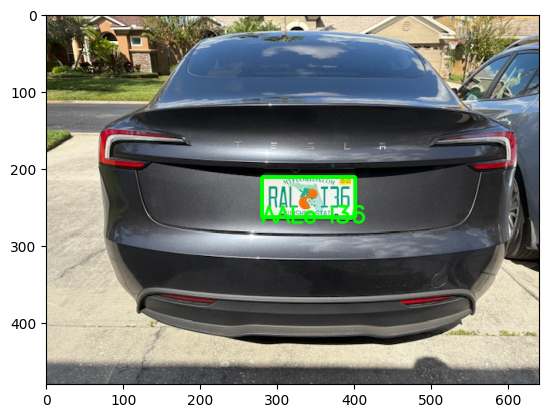

In [20]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))